In [4]:
# CLEANING EACH TABLE AND REORGANIZING THE TABLES INTO df1 and df2 DATASETS
#Study 'Table 1' as Stock dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl
UNstock = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 1')
# Delete the blue title paragrphs
UNstock = UNstock.drop(labels=range(0,14), axis=0)
# Make new column header
UNstock.rename(columns=UNstock.iloc[0], inplace = True)
UNstock.drop(UNstock.index[0], inplace = True)
#Add column names
UNstock.columns = ['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data', 
                   '1990B','1995B','2000B','2005B','2010B','2015B',
                   '1990M','1995M','2000M','2005M','2010M','2015M',
                   '1990F','1995F','2000F','2005F','2010F','2015F'
                   ]
#Split UNstock into three dataframes by female, male and both sexs
# both sexs
StockB = UNstock.iloc[:,0:11]
StockB = StockB.rename(columns={'1990B': '1990','1995B': '1995', '2000B': '2000',
                       '2005B': '2005','2010B': '2010', '2015B': '2015'})
StockB = StockB.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", "Type of data"],
                     var_name = ["year"], value_name = 'International migrant stock at mid-year(both sexs)')
# by male
StockM = UNstock[['Sort order', 'Destination','Notes', 'Country code', 'Type of data',
                    '1990M','1995M','2000M','2005M','2010M','2015M']]
StockM = StockM.rename(columns={'1990M': '1990','1995M': '1995', '2000M': '2000',
                       '2005M': '2005','2010M': '2010', '2015M': '2015'})
StockM = StockM.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", "Type of data"],
                     var_name = ["year"], value_name = 'International migrant stock at mid-year (male)')
# by female
StockF = UNstock[['Sort order', 'Destination','Notes', 'Country code', 'Type of data',
                  '1990F','1995F','2000F','2005F','2010F','2015F']]
StockF = StockF.rename(columns={'1990F': '1990','1995F': '1995', '2000F': '2000',
                       '2005F': '2005','2010F': '2010', '2015F': '2015'})
StockF = StockF.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", "Type of data"],
                     var_name = ["year"], value_name = 'International migrant stock at mid-year (female)')
# Merge three stock dataframes and store as Stock dataset
Stock = StockF.merge(StockM, on=['Sort order','Destination','Notes', 'Country code', 'Type of data','year'])
Stock = Stock.merge(StockB, on=['Sort order','Destination','Notes', 'Country code', 'Type of data','year'])
Stock

Sort order                                        Destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
...         ...                                                ...   ...   
1585        261                                              Samoa   NaN   
1586        262                                            Tokelau   NaN   
1587        263                                              Tonga   NaN   
1588        264                                             Tuvalu   NaN   
1589        265                          Wallis and Futuna Islands   NaN   

     Country code Type of data  year  \
0             900          NaN  1990   
1             901          NaN  1990   
2             902          NaN  1990   
3             941          NaN  1990   
4             934          NaN  1990   
...           ...          ...   ...   
1585          882            B  2015   
1586          772            B  2015   
1587          776            B  2015   
1588          798            C  2015   
1589          876            B  2015   

     International migrant stock at mid-year (female)  \
0                                            74815702   
1                                            42115231   
2                                            32700471   
3                                             5236216   
4                                            27464255   
...                                               ...   
1585                                           2460.0   
1586                                            254.0   
1587                                           2604.0   
1588                                             63.0   
1589                                           1411.0   

     International migrant stock at mid-year (male)  \
0                                          77747510   
1                                          40263397   
2                                          37484113   
3                                           5843107   
4                                          31641006   
...                                             ...   
1585                                         2469.0   
1586                                          233.0   
1587                                         3127.0   
1588                                           78.0   
1589                                         1438.0   

     International migrant stock at mid-year(both sexs)  
0                                             152563212  
1                                              82378628  
2                                              70184584  
3                                              11075966  
4                                              59105261  
...                                                 ...  
1585                                             4929.0  
1586                                              487.0  
1587                                             5731.0  
1588                                              141.0  
1589                                             2849.0  

[1590 rows x 9 columns]

In [5]:
#Study 'Table 2' as Pop dataset
UNpop = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 2')
# Delete the blue title paragrphs
UNpop = UNpop.drop(labels=range(0,14), axis=0)
# Make new column header
UNpop.rename(columns=UNpop.iloc[0], inplace = True)
UNpop.drop(UNpop.index[0], inplace = True)
#Add column names
UNpop.columns = ['Sort order', 'Destination', 'Notes', 'Country code',
                   '1990B','1995B','2000B','2005B','2010B','2015B',
                   '1990M','1995M','2000M','2005M','2010M','2015M',
                   '1990F','1995F','2000F','2005F','2010F','2015F'
                   ]
#Split UNpop into three dataframes by female, male and both sexs
# both sexs
PopB = UNpop.iloc[:,0:10]
PopB = PopB.rename(columns={'1990B': '1990','1995B': '1995', '2000B': '2000',
                       '2005B': '2005','2010B': '2010', '2015B': '2015'})
PopB = PopB.melt(id_vars=["Sort order", "Destination", "Notes", "Country code"],
                     var_name = ["year"], value_name = 'Total population of both sexs at mid-year(thousands)')
# by male
PopM = UNpop[['Sort order', 'Destination','Notes', 'Country code',
                    '1990M','1995M','2000M','2005M','2010M','2015M']]
PopM = PopM.rename(columns={'1990M': '1990','1995M': '1995', '2000M': '2000',
                       '2005M': '2005','2010M': '2010', '2015M': '2015'})
PopM = PopM.melt(id_vars=["Sort order", "Destination", "Notes", "Country code"],
                     var_name = ["year"], value_name = 'Total male population at mid-year(thousands)')
# by female
PopF = UNpop[['Sort order', 'Destination','Notes', 'Country code',
                    '1990F','1995F','2000F','2005F','2010F','2015F']]
PopF = PopF.rename(columns={'1990F': '1990','1995F': '1995', '2000F': '2000',
                       '2005F': '2005','2010F': '2010', '2015F': '2015'})
PopF = PopF.melt(id_vars=["Sort order", "Destination", "Notes", "Country code"],
                     var_name = ["year"], value_name = 'Total female population at mid-year(thousands)')
# Merge three population dataframes and store as Pop dataset
Pop = PopF.merge(PopM, on=['Sort order','Destination','Notes', 'Country code','year'])
Pop = Pop.merge(PopB, on=['Sort order','Destination','Notes', 'Country code', 'year'])
Pop

Sort order                                        Destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
...         ...                                                ...   ...   
1585        261                                              Samoa   NaN   
1586        262                                            Tokelau   NaN   
1587        263                                              Tonga   NaN   
1588        264                                             Tuvalu   NaN   
1589        265                          Wallis and Futuna Islands   NaN   

     Country code  year Total female population at mid-year(thousands)  \
0             900  1990                                    2639243.998   
1             901  1990                                     589207.436   
2             902  1990                                    2050036.562   
3             941  1990                                     256015.073   
4             934  1990                                    1794021.489   
...           ...   ...                                            ...   
1585          882  2015                                         93.584   
1586          772  2015                                             ..   
1587          776  2015                                         52.931   
1588          798  2015                                             ..   
1589          876  2015                                             ..   

     Total male population at mid-year(thousands)  \
0                                     2670423.701   
1                                      555255.626   
2                                     2115168.075   
3                                      254042.556   
4                                     1861125.519   
...                                           ...   
1585                                       99.644   
1586                                           ..   
1587                                       53.239   
1588                                           ..   
1589                                           ..   

     Total population of both sexs at mid-year(thousands)  
0                                           5309667.699    
1                                           1144463.062    
2                                           4165204.637    
3                                            510057.629    
4                                           3655147.008    
...                                                 ...    
1585                                            193.228    
1586                                               1.25    
1587                                             106.17    
1588                                              9.916    
1589                                             13.151    

[1590 rows x 8 columns]

In [6]:
#Study 'Table 3' as Stock_percent dataset('Stock as percentage of total population')
UNstock_percent = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 3')
# Delete the blue title paragrphs
UNstock_percent = UNstock_percent.drop(labels=range(0,14), axis=0)
# Make new column header
UNstock_percent.rename(columns=UNstock_percent.iloc[0], inplace = True)
UNstock_percent.drop(UNstock_percent.index[0], inplace = True)
#Add column names
UNstock_percent.columns = ['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data',
                   '1990B','1995B','2000B','2005B','2010B','2015B',
                   '1990M','1995M','2000M','2005M','2010M','2015M',
                   '1990F','1995F','2000F','2005F','2010F','2015F'
                   ]
#Split UNpop into three dataframes by female, male and both sexs
# both sexs
Stock_percentB = UNstock_percent.iloc[:,0:11]
Stock_percentB = Stock_percentB.rename(columns={'1990B': '1990','1995B': '1995', '2000B': '2000',
                       '2005B': '2005','2010B': '2010', '2015B': '2015'})
Stock_percentB = Stock_percentB.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", 'Type of data'],
                     var_name = ["year"], value_name = 'International migrant stock as a percentage of the total population (both sexs)')
# by male
Stock_percentM = UNstock_percent[['Sort order', 'Destination','Notes', 'Country code','Type of data',
                    '1990M','1995M','2000M','2005M','2010M','2015M']]
Stock_percentM = Stock_percentM.rename(columns={'1990M': '1990','1995M': '1995', '2000M': '2000',
                       '2005M': '2005','2010M': '2010', '2015M': '2015'})
Stock_percentM = Stock_percentM.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", 'Type of data'],
                     var_name = ["year"], value_name = 'International migrant stock as a percentage of the total population (male)')
# by female
Stock_percentF = UNstock_percent[['Sort order', 'Destination','Notes', 'Country code','Type of data',
                    '1990F','1995F','2000F','2005F','2010F','2015F']]
Stock_percentF = Stock_percentF.rename(columns={'1990F': '1990','1995F': '1995', '2000F': '2000',
                       '2005F': '2005','2010F': '2010', '2015F': '2015'})
Stock_percentF = Stock_percentF.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", 'Type of data'],
                     var_name = ["year"], value_name = 'International migrant stock as a percentage of the total population (female)')
# Merge three stock percentage dataframes and store as Stock_percent dataset
Stock_percent = Stock_percentF.merge(Stock_percentM, on=['Sort order','Destination','Notes', 'Country code','year', 'Type of data'])
Stock_percent = Stock_percent.merge(Stock_percentB, on=['Sort order','Destination','Notes', 'Country code', 'year', 'Type of data'])
Stock_percent

Sort order                                        Destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
...         ...                                                ...   ...   
1585        261                                              Samoa   NaN   
1586        262                                            Tokelau   NaN   
1587        263                                              Tonga   NaN   
1588        264                                             Tuvalu   NaN   
1589        265                          Wallis and Futuna Islands   NaN   

     Country code Type of data  year  \
0             900          NaN  1990   
1             901          NaN  1990   
2             902          NaN  1990   
3             941          NaN  1990   
4             934          NaN  1990   
...           ...          ...   ...   
1585          882            B  2015   
1586          772            B  2015   
1587          776            B  2015   
1588          798            C  2015   
1589          876            B  2015   

     International migrant stock as a percentage of the total population (female)  \
0                                               2.83474                             
1                                              7.147777                             
2                                              1.595116                             
3                                              2.045276                             
4                                              1.530877                             
...                                                 ...                             
1585                                           2.628654                             
1586                                                 ..                             
1587                                           4.919612                             
1588                                                 ..                             
1589                                                 ..                             

     International migrant stock as a percentage of the total population (male)  \
0                                               2.91143                           
1                                              7.251326                           
2                                              1.772158                           
3                                               2.30005                           
4                                              1.700101                           
...                                                 ...                           
1585                                           2.477821                           
1586                                                 ..                           
1587                                           5.873514                           
1588                                                 ..                           
1589                                                 ..                           

     International migrant stock as a percentage of the total population (both sexs)  
0                                               2.87331                               
1                                              7.198015                               
2                                              1.685021                               
3                                              2.171513                               
4                                              1.617042                               
...                                                 ...                

In [7]:
#Study 'Table 4' as FMpercent dataset ('Female migrants as a percentage of the international migrant stock')
FMpercent = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 4')
# Delete the blue title paragrphs
FMpercent = FMpercent.drop(labels=range(0,14), axis=0)
# Make new column header
FMpercent.rename(columns=FMpercent.iloc[0], inplace = True)
FMpercent.drop(FMpercent.index[0], inplace = True)
# Add column names
FMpercent.columns = ['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data',
                   '1990','1995','2000','2005','2010','2015'
                   ]
# Adjust the dataframe and store as FMpercent dataset
FMpercent = FMpercent.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", 'Type of data'],
                     var_name = ["year"], value_name = 'Female migrants as a percentage of the international migrant stock')
FMpercent

Sort order                                        Destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
...         ...                                                ...   ...   
1585        261                                              Samoa   NaN   
1586        262                                            Tokelau   NaN   
1587        263                                              Tonga   NaN   
1588        264                                             Tuvalu   NaN   
1589        265                          Wallis and Futuna Islands   NaN   

     Country code Type of data  year  \
0             900          NaN  1990   
1             901          NaN  1990   
2             902          NaN  1990   
3             941          NaN  1990   
4             934          NaN  1990   
...           ...          ...   ...   
1585          882            B  2015   
1586          772            B  2015   
1587          776            B  2015   
1588          798            C  2015   
1589          876            B  2015   

     Female migrants as a percentage of the international migrant stock  
0                                              49.03915                  
1                                             51.123977                  
2                                             46.592099                  
3                                             47.261155                  
4                                             46.466684                  
...                                                 ...                  
1585                                          49.908704                  
1586                                          52.156057                  
1587                                          45.437096                  
1588                                          44.680851                  
1589                                           49.52615                  

[1590 rows x 7 columns]

In [8]:
#Study 'Table 5' as MigrantRateChange dataset(Annual rate of change of the migrant stock )
MigrantRateChange = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 5')
# Delete the blue title paragrphs
MigrantRateChange = MigrantRateChange.drop(labels=range(0,14), axis=0)
# Make new column header
MigrantRateChange.rename(columns=MigrantRateChange.iloc[0], inplace = True)
MigrantRateChange.drop(MigrantRateChange.index[0], inplace = True)
# Add column names
MigrantRateChange.columns = ['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data',
                     '1990-1995B','1995-2000B','2000-2005B','2005-2010B','2010-2015B',
                     '1990-1995M','1995-2000M','2000-2005M','2005-2010M','2010-2015M',
                     '1990-1995F','1995-2000F','2000-2005F','2005-2010F','2010-2015F'
                   ]
#Split RateofChange into three dataframes by female, male and both sexs
# both sexs
MigrantRateChangeB = MigrantRateChange.iloc[:,0:10]
MigrantRateChangeB = MigrantRateChangeB.rename(columns={'1990-1995B': '1990-1995' ,'1995-2000B': '1995-2000','2000-2005B': '2000-2005',
                                              '2005-2010B': '2005-2010','2010-2015B': '2010-2015'})
MigrantRateChangeB = MigrantRateChangeB.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", 'Type of data'],
                     var_name = ["Range of year"], value_name = 'Annual rate of change of the migrant stock(both sexs)')
# by male
MigrantRateChangeM = MigrantRateChange[['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data',
                     '1990-1995M','1995-2000M','2000-2005M','2005-2010M','2010-2015M']]
MigrantRateChangeM = MigrantRateChangeM.rename(columns={'1990-1995M': '1990-1995' ,'1995-2000M': '1995-2000','2000-2005M': '2000-2005',
                                              '2005-2010M': '2005-2010','2010-2015M': '2010-2015'})
MigrantRateChangeM = MigrantRateChangeM.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", 'Type of data'],
                     var_name = ["Range of year"], value_name = 'Annual rate of change of the migrant stock(male)')
# by female
MigrantRateChangeF = MigrantRateChange[['Sort order', 'Destination','Notes', 'Country code','Type of data',
                    '1990-1995F','1995-2000F','2000-2005F','2005-2010F','2010-2015F']]
MigrantRateChangeF = MigrantRateChangeF.rename(columns={'1990-1995F': '1990-1995' ,'1995-2000F': '1995-2000','2000-2005F': '2000-2005',
                                              '2005-2010F': '2005-2010','2010-2015F': '2010-2015'})
MigrantRateChangeF = MigrantRateChangeF.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", 'Type of data'],
                     var_name = ["Range of year"], value_name = 'Annual rate of change of the migrant stock(female)')
# Merge three stock percentage dataframes and store as MigrantRateChange dataset
MigrantRateChange = MigrantRateChangeF.merge(MigrantRateChangeM, on=['Sort order','Destination','Notes', 'Country code', 'Type of data', 'Range of year'])
MigrantRateChange = MigrantRateChange.merge(MigrantRateChangeB, on=['Sort order','Destination','Notes', 'Country code', 'Type of data', 'Range of year'])
MigrantRateChange

Sort order                                        Destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
...         ...                                                ...   ...   
1320        261                                              Samoa   NaN   
1321        262                                            Tokelau   NaN   
1322        263                                              Tonga   NaN   
1323        264                                             Tuvalu   NaN   
1324        265                          Wallis and Futuna Islands   NaN   

     Country code Type of data Range of year  \
0             900          NaN     1990-1995   
1             901          NaN     1990-1995   
2             902          NaN     1990-1995   
3             941          NaN     1990-1995   
4             934          NaN     1990-1995   
...           ...          ...           ...   
1320          882            B     2010-2015   
1321          772            B     2010-2015   
1322          776            B     2010-2015   
1323          798            C     2010-2015   
1324          876            B     2010-2015   

     Annual rate of change of the migrant stock(female)  \
0                                              1.104667   
1                                              2.285643   
2                                             -0.526904   
3                                              1.249146   
4                                              -0.88418   
...                                                 ...   
1320                                          -0.545343   
1321                                            2.60325   
1322                                           2.526318   
1323                                          -1.819436   
1324                                           0.516899   

     Annual rate of change of the migrant stock(male)  \
0                                            1.000922   
1                                            2.265595   
2                                            -0.45298   
3                                            1.000073   
4                                           -0.733256   
...                                               ...   
1320                                        -0.987758   
1321                                         2.463246   
1322                                         2.737439   
1323                                        -1.718849   
1324                                          0.52134   

     Annual rate of change of the migrant stock(both sexs)  
0                                              1.051865     
1                                              2.275847     
2                                             -0.487389     
3                                              1.118175     
4                                             -0.803244     
...                                                 ...     
1320                                          -0.768177     
1321                                           2.536144     
1322                                           2.641235     
1323                                          -1.763854     
1324                                            0.51914     

[1325 rows x 9 columns]

In [9]:
#Study 'Table 6': Divide into three: First one is stored as RefugStockB dataset
Table6 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 6')
# Delete the blue title paragrphs
Table6 = Table6.drop(labels=range(0,14), axis=0)
Table6
# Make new column header
Table6.rename(columns=Table6.iloc[0], inplace = True)
Table6.drop(Table6.index[0], inplace = True)
Table6
# Add column names
Table6.columns = ['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data',
                     '1990R','1995R','2000R','2005R','2010R','2015R',
                     '1990P','1995P','2000P','2005P','2010P','2015P',
                     '1990-1995','1995-2000','2000-2005','2005-2010','2010-2015'
                   ]
# Obtain the Estimated refugee stock for both sex at mid-year dataset and store as RefugStockB dataset
RefugStockB = Table6.iloc[:,0:11]
RefugStockB = RefugStockB.rename(columns={'1990R': '1990','1995R': '1995', '2000R': '2000',
                       '2005R': '2005','2010R': '2010', '2015R': '2015'})
RefugStockB = RefugStockB.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", 'Type of data'],
                     var_name = ["year"], value_name = 'Estimated refugee stock at mid-year(both sexs)')
RefugStockB

Sort order                                        Destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
...         ...                                                ...   ...   
1585        261                                              Samoa   NaN   
1586        262                                            Tokelau   NaN   
1587        263                                              Tonga   NaN   
1588        264                                             Tuvalu   NaN   
1589        265                          Wallis and Futuna Islands   NaN   

     Country code Type of data  year  \
0             900          NaN  1990   
1             901          NaN  1990   
2             902          NaN  1990   
3             941          NaN  1990   
4             934          NaN  1990   
...           ...          ...   ...   
1585          882            B  2015   
1586          772            B  2015   
1587          776            B  2015   
1588          798            C  2015   
1589          876            B  2015   

     Estimated refugee stock at mid-year(both sexs)  
0                                          18836571  
1                                           2014564  
2                                          16822007  
3                                           5048391  
4                                          11773616  
...                                             ...  
1585                                            0.0  
1586                                            0.0  
1587                                            0.0  
1588                                            0.0  
1589                                            0.0  

[1590 rows x 7 columns]

In [10]:
#Study 'Table 6': Divide into three: Second one is stored as RefugPercent dataset
# Obtain the Refugees as a percentage of the international migrant stock dataset and store as RefugPercent dataset
RefugPercent = Table6[['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data',
                     '1990P','1995P','2000P','2005P','2010P','2015P']]
RefugPercent = RefugPercent.rename(columns={'1990P': '1990','1995P': '1995', '2000P': '2000',
                       '2005P': '2005','2010P': '2010', '2015P': '2015'})
RefugPercent = RefugPercent.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", 'Type of data'],
                     var_name = ["year"], value_name = 'Refugees as a percentage of the international migrant stock')
RefugPercent

Sort order                                        Destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
...         ...                                                ...   ...   
1585        261                                              Samoa   NaN   
1586        262                                            Tokelau   NaN   
1587        263                                              Tonga   NaN   
1588        264                                             Tuvalu   NaN   
1589        265                          Wallis and Futuna Islands   NaN   

     Country code Type of data  year  \
0             900          NaN  1990   
1             901          NaN  1990   
2             902          NaN  1990   
3             941          NaN  1990   
4             934          NaN  1990   
...           ...          ...   ...   
1585          882            B  2015   
1586          772            B  2015   
1587          776            B  2015   
1588          798            C  2015   
1589          876            B  2015   

     Refugees as a percentage of the international migrant stock  
0                                             12.346732           
1                                              2.445494           
2                                             23.968236           
3                                              45.56588           
4                                             19.919743           
...                                                 ...           
1585                                                0.0           
1586                                                0.0           
1587                                                0.0           
1588                                                0.0           
1589                                                0.0           

[1590 rows x 7 columns]

In [11]:
#Study 'Table 6': Divide into three: Third one is stored as RefugPercent dataset
# Obtain the annual rate of change of the refugee stock dataset and store as RefugeeRateChange dataset
RefugeeRateChange = Table6[['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data',
                     '1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']]
RefugeeRateChange = RefugeeRateChange.melt(id_vars=["Sort order", "Destination", "Notes", "Country code", 'Type of data'],
                     var_name = ["Range of year"], value_name = 'Annual rate of change of the refugee stock')
RefugeeRateChange

Sort order                                        Destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
...         ...                                                ...   ...   
1320        261                                              Samoa   NaN   
1321        262                                            Tokelau   NaN   
1322        263                                              Tonga   NaN   
1323        264                                             Tuvalu   NaN   
1324        265                          Wallis and Futuna Islands   NaN   

     Country code Type of data Range of year  \
0             900          NaN     1990-1995   
1             901          NaN     1990-1995   
2             902          NaN     1990-1995   
3             941          NaN     1990-1995   
4             934          NaN     1990-1995   
...           ...          ...           ...   
1320          882            B     2010-2015   
1321          772            B     2010-2015   
1322          776            B     2010-2015   
1323          798            C     2010-2015   
1324          876            B     2010-2015   

     Annual rate of change of the refugee stock  
0                                     -2.123497  
1                                      9.388424  
2                                     -2.839417  
3                                     -0.680327  
4                                       -4.3836  
...                                         ...  
1320                                         ..  
1321                                         ..  
1322                                         ..  
1323                                         ..  
1324                                         ..  

[1325 rows x 7 columns]

In [12]:
# Merge stock, pop, Stock_percent, FMpercent, RefugStockB and RefugPercent as df1 dataset based on year
df1 = Stock.merge(Pop,  on=['Sort order','Destination','Notes', 'Country code', 'year'])
df1 = df1.merge(Stock_percent, on=['Sort order','Destination','Notes', 'Country code', 'Type of data', 'year'])
df1 = df1.merge(FMpercent, on=['Sort order','Destination','Notes', 'Country code', 'Type of data', 'year'])

df1 = df1.merge(RefugPercent, on=['Sort order','Destination','Notes', 'Country code', 'Type of data', 'year'])
df1.head(2)

Sort order        Destination Notes Country code Type of data  year  \
0          1              WORLD   NaN          900          NaN  1990   
1          2  Developed regions   (b)          901          NaN  1990   

  International migrant stock at mid-year (female)  \
0                                         74815702   
1                                         42115231   

  International migrant stock at mid-year (male)  \
0                                       77747510   
1                                       40263397   

  International migrant stock at mid-year(both sexs)  \
0                                          152563212   
1                                           82378628   

  Total female population at mid-year(thousands)  \
0                                    2639243.998   
1                                     589207.436   

  Total male population at mid-year(thousands)  \
0                                  2670423.701   
1                                   555255.626   

  Total population of both sexs at mid-year(thousands)  \
0                                        5309667.699     
1                                        1144463.062     

  International migrant stock as a percentage of the total population (female)  \
0                                            2.83474                             
1                                           7.147777                             

  International migrant stock as a percentage of the total population (male)  \
0                                            2.91143                           
1                                           7.251326                           

  International migrant stock as a percentage of the total population (both sexs)  \
0                                            2.87331                                
1                                           7.198015                                

  Female migrants as a percentage of the international migrant stock  \
0                                           49.03915                   
1                                          51.123977                   

  Refugees as a percentage of the international migrant stock  
0                                          12.346732           
1                                           2.445494

In [13]:
# Merge RefugeeRateChange and MigrantRateChange as df2 based on Range of year
df2 = MigrantRateChange.merge(RefugeeRateChange, on=['Sort order','Destination','Notes', 'Country code', 'Type of data', 'Range of year'])
df2.head(2)

Sort order        Destination Notes Country code Type of data Range of year  \
0          1              WORLD   NaN          900          NaN     1990-1995   
1          2  Developed regions   (b)          901          NaN     1990-1995   

  Annual rate of change of the migrant stock(female)  \
0                                           1.104667   
1                                           2.285643   

  Annual rate of change of the migrant stock(male)  \
0                                         1.000922   
1                                         2.265595   

  Annual rate of change of the migrant stock(both sexs)  \
0                                           1.051865      
1                                           2.275847      

  Annual rate of change of the refugee stock  
0                                  -2.123497  
1                                   9.388424

In [14]:
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

[Text(0, 0, 'United States of America'),
 Text(0, 1, 'Germany'),
 Text(0, 2, 'Russian Federation'),
 Text(0, 3, 'United Kingdom of Great Britain and Northern Ireland'),
 Text(0, 4, 'Canada')]

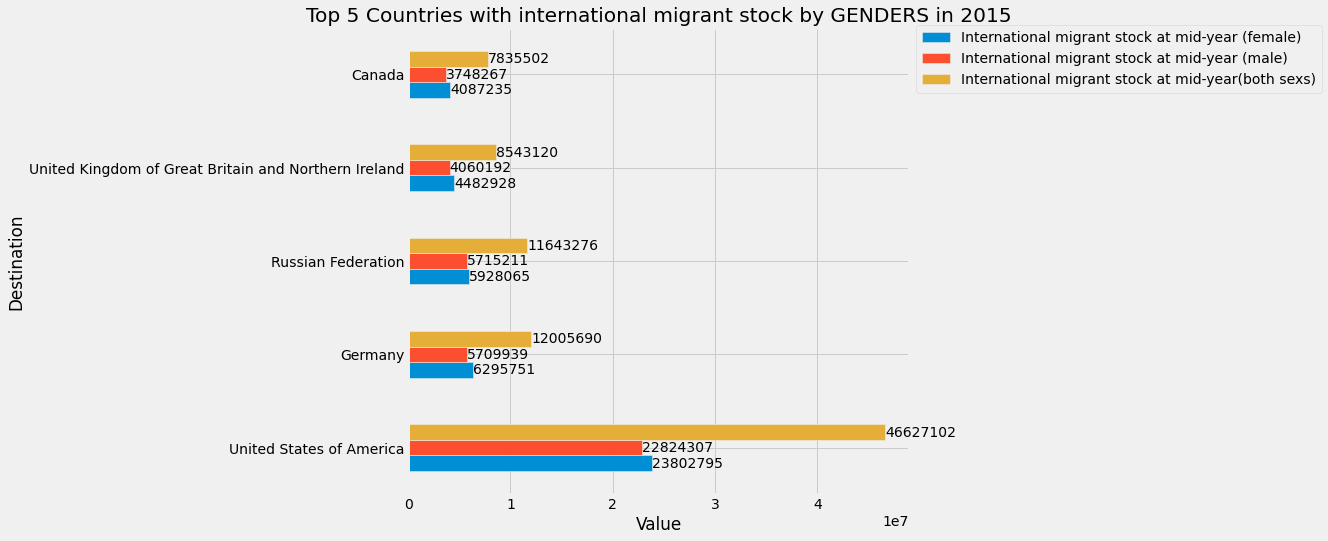

In [15]:
# Exploratory Data Analysis 
# Firstly, I'd like to check the top 5 countries/islands of migrant stocks ranking around the world.

#(1) In 2015
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#filter the df1 as all the data are in 2015
data1 = df1[df1.year == '2015']
#only keep the rows which describes the data for countries/islands, not for major areas or clusters
data1 = data1.drop(data1.index[[0,1,2,3,4,5,6,7,28,38,46,52,70,71,77,85,97,107,126,127,138,152,169,179,180,207,216,231,237,238,241,247,255]])
#only keep the international migrant stock by genders in 2015
data1 = data1[['Destination', 'International migrant stock at mid-year (female)', 'International migrant stock at mid-year (male)', 'International migrant stock at mid-year(both sexs)']]
#sorting the data1 dataset in descending order and select the top 5
data1 = data1.sort_values(by=['International migrant stock at mid-year (female)', 'International migrant stock at mid-year (male)', 'International migrant stock at mid-year(both sexs)'],ascending=False).head(5)

ax1 = data1.plot(kind='barh', ylabel='Destination', title='Top 5 Countries with international migrant stock by GENDERS in 2015', figsize=(8,8))
ax1.set(xlabel='Value')
for x in ax1.containers:
    # set the bar label
    ax1.bar_label(x, fmt='%.0f',label_type='edge')

# move the legend out of the plot
ax1.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

#rename the ylabels according to the sorted 'data1' dataset
yticklabels=['United States of America','Germany','Russian Federation','United Kingdom of Great Britain and Northern Ireland', 'Canada']
ax1.set_yticklabels(yticklabels)

[Text(0, 0, 'United States of America'),
 Text(0, 1, 'Russian Federation'),
 Text(0, 2, 'Ukraine'),
 Text(0, 3, 'India'),
 Text(0, 4, 'Pakistan')]

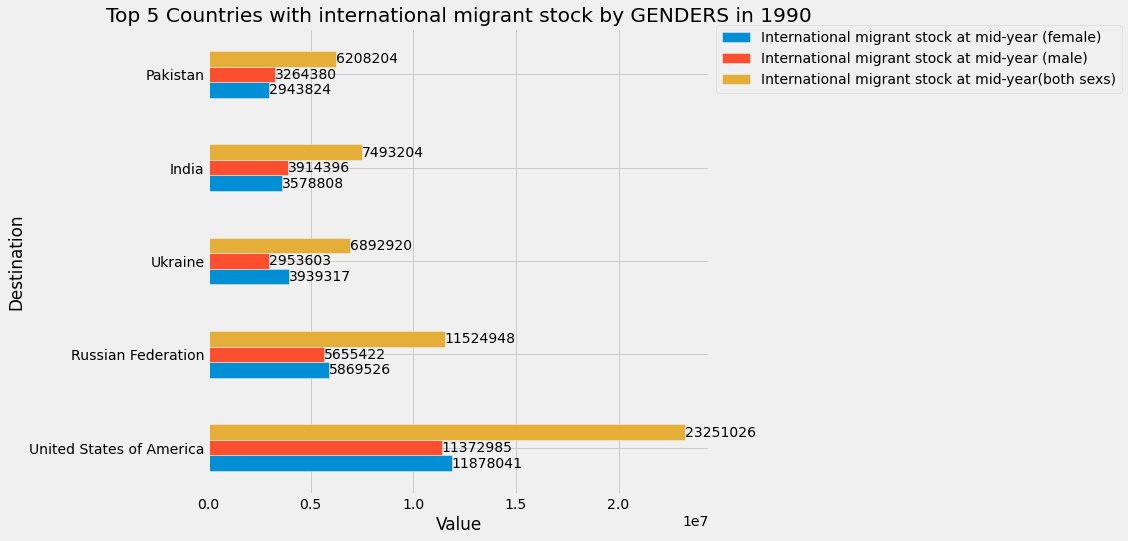

In [16]:
#(2) In 1990
#filter the df1 as all the data are in 1990
data2 = df1[df1.year == '1990']
data2 = data2.drop(data2.index[[0,1,2,3,4,5,6,7,28,38,46,52,70,71,77,85,97,107,126,127,138,152,169,179,180,207,216,231,237,238,241,247,255]])
data2 = data2[['Destination', 'International migrant stock at mid-year (female)', 'International migrant stock at mid-year (male)', 'International migrant stock at mid-year(both sexs)']]
data2 = data2.sort_values(by=['International migrant stock at mid-year (female)', 'International migrant stock at mid-year (male)', 'International migrant stock at mid-year(both sexs)'],ascending=False)
data2 = data2.drop(data2.index[range(4)]) # drop the first 4 missing rows for the sorted 'data2' dataset
data2 = data2.head(5)

ax2 = data2.plot(kind='barh', ylabel='Destination', title='Top 5 Countries with international migrant stock by GENDERS in 1990', figsize=(8,8))
ax2.set(xlabel='Value')
for x in ax2.containers:
    # set the bar label
    ax2.bar_label(x, fmt='%.0f',label_type='edge')

# move the legend out of the plot
ax2.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

#rename the ylabels according to the sorted 'data1' dataset
yticklabels=['United States of America','Russian Federation','Ukraine', 'India', 'Pakistan']
ax2.set_yticklabels(yticklabels)

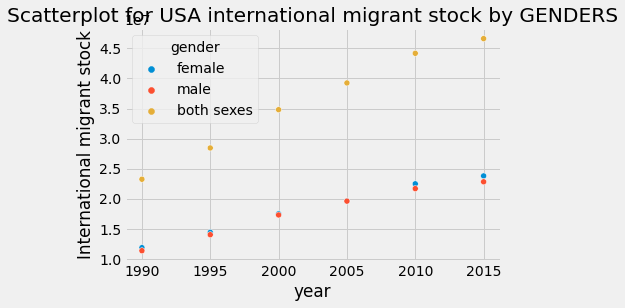

In [17]:
# Through observing these two barplots, we can figure out that USA is always the top country 
# which attracts most international migrants by all genders at the beginning and end years in the dataset we study.

#Secondly, I would like to analyze the change of USA data through years

#only keep the rows of USA data
USA = df1[df1.Destination == 'United States of America']
#(1) Check the distribution of USA international migrant stock through years
# recleaning the dataset stored as USAmigrant
USAmigrant1 = USA[["Sort order", "Destination", "Notes", "Country code","Type of data","year", "International migrant stock at mid-year (female)"]]
gender1 = ['female','female','female','female','female','female']
USAmigrant1 = pd.DataFrame(USAmigrant1)
USAmigrant1['gender']=gender1
USAmigrant1.rename(columns={"International migrant stock at mid-year (female)": 'International migrant stock'}, inplace=True)

USAmigrant2 = USA[["Sort order", "Destination", "Notes", "Country code","Type of data","year", "International migrant stock at mid-year (male)"]]
gender2 = ['male','male','male','male','male','male']
USAmigrant2 = pd.DataFrame(USAmigrant2)
USAmigrant2['gender']=gender2
USAmigrant2.rename(columns={"International migrant stock at mid-year (male)": 'International migrant stock'}, inplace=True)

USAmigrant3 = USA[["Sort order", "Destination", "Notes", "Country code","Type of data","year", "International migrant stock at mid-year(both sexs)"]]
gender3 = ['both sexes','both sexes','both sexes','both sexes','both sexes','both sexes']
USAmigrant3 = pd.DataFrame(USAmigrant3)
USAmigrant3['gender']=gender3
USAmigrant3.rename(columns={"International migrant stock at mid-year(both sexs)": 'International migrant stock'}, inplace=True)
#merge
USAmigrant = USAmigrant1.append(USAmigrant2)
USAmigrant = USAmigrant.append(USAmigrant3)
USAmigrant

#Scatterplot
fig1 =sns.scatterplot(data=USAmigrant, x="year", y="International migrant stock", hue="gender").set(title='Scatterplot for USA international migrant stock by GENDERS')


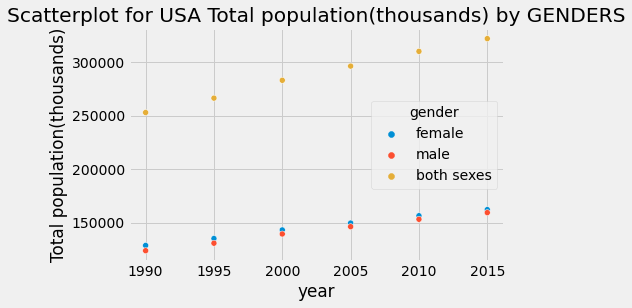

In [18]:
#(2) Check the distribution of USA population through years
# recleaning the dataset stored as USApop
USApop1 = USA[["Sort order", "Destination", "Notes", "Country code","Type of data","year", "Total female population at mid-year(thousands)"]]
gender1 = ['female','female','female','female','female','female']
USApop1 = pd.DataFrame(USApop1)
USApop1['gender']=gender1
USApop1.rename(columns={"Total female population at mid-year(thousands)": 'Total population(thousands)'}, inplace=True)

USApop2 = USA[["Sort order", "Destination", "Notes", "Country code","Type of data","year", "Total male population at mid-year(thousands)"]]
gender2 = ['male','male','male','male','male','male']
USApop2 = pd.DataFrame(USApop2)
USApop2['gender']=gender2
USApop2.rename(columns={"Total male population at mid-year(thousands)": 'Total population(thousands)'}, inplace=True)

USApop3 = USA[["Sort order", "Destination", "Notes", "Country code","Type of data","year", "Total population of both sexs at mid-year(thousands)"]]
gender3 = ['both sexes','both sexes','both sexes','both sexes','both sexes','both sexes']
USApop3 = pd.DataFrame(USApop3)
USApop3['gender']=gender3
USApop3.rename(columns={"Total population of both sexs at mid-year(thousands)": 'Total population(thousands)'}, inplace=True)
USApop3

#merge
USApop = USApop1.append(USApop2)
USApop = USApop.append(USApop3)
USApop

#Scatterplot
fig2 =sns.scatterplot(data=USApop, x="year", y="Total population(thousands)", hue="gender").set(title='Scatterplot for USA Total population(thousands) by GENDERS')

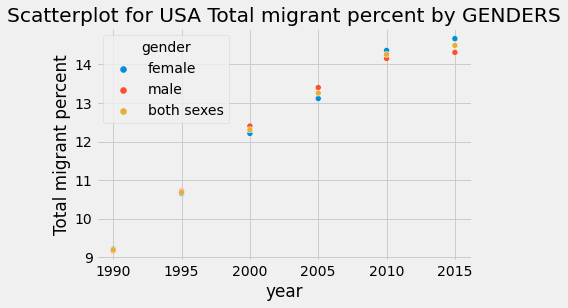

In [19]:
#(3) Check the distribution of USA International migrant stock as a percentage of the total population through years
# recleaning the dataset stored as USAmigpercent
USAmigpercent1 = USA[["Sort order", "Destination", "Notes", "Country code","Type of data","year", "International migrant stock as a percentage of the total population (female)"]]
gender1 = ['female','female','female','female','female','female']
USAmigpercent1 = pd.DataFrame(USAmigpercent1)
USAmigpercent1['gender']=gender1
USAmigpercent1.rename(columns={"International migrant stock as a percentage of the total population (female)": 'Total migrant percent'}, inplace=True)

USAmigpercent2 = USA[["Sort order", "Destination", "Notes", "Country code","Type of data","year", "International migrant stock as a percentage of the total population (male)"]]
gender2 = ['male','male','male','male','male','male']
USAmigpercent2 = pd.DataFrame(USAmigpercent2)
USAmigpercent2['gender']=gender2
USAmigpercent2.rename(columns={"International migrant stock as a percentage of the total population (male)": 'Total migrant percent'}, inplace=True)

USAmigpercent3 = USA[["Sort order", "Destination", "Notes", "Country code","Type of data","year", "International migrant stock as a percentage of the total population (both sexs)"]]
gender3 = ['both sexes','both sexes','both sexes','both sexes','both sexes','both sexes']
USAmigpercent3 = pd.DataFrame(USAmigpercent3)
USAmigpercent3['gender']=gender3
USAmigpercent3.rename(columns={"International migrant stock as a percentage of the total population (both sexs)": 'Total migrant percent'}, inplace=True)

#merge
USAmigpercent = USAmigpercent1.append(USAmigpercent2)
USAmigpercent = USAmigpercent.append(USAmigpercent3)

#Scatterplot
fig3 =sns.scatterplot(data=USAmigpercent, x="year", y="Total migrant percent", hue="gender").set(title='Scatterplot for USA Total migrant percent by GENDERS')

[(0.0, 100.0)]

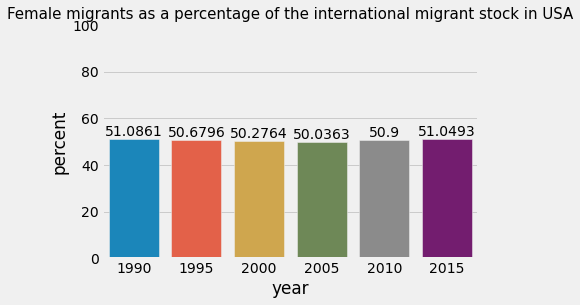

In [20]:
#Through observing the scatterplots, we can see that the USA female migrant is get higher and higher over years
USA_Fmigrantperc = USA[["Sort order", "Destination", "Notes", "Country code","Type of data","year", "Female migrants as a percentage of the international migrant stock"]]
USA_Fmigrantperc

ax3 = sns.barplot(x="year", y="Female migrants as a percentage of the international migrant stock", data=USA_Fmigrantperc)
ax3.bar_label(ax3.containers[0])
ax3.set_ylabel('percent')
ax3.set_title('Female migrants as a percentage of the international migrant stock in USA', fontsize=15)
ax3.set(ylim=(0, 100))

[(0.0, 100.0)]

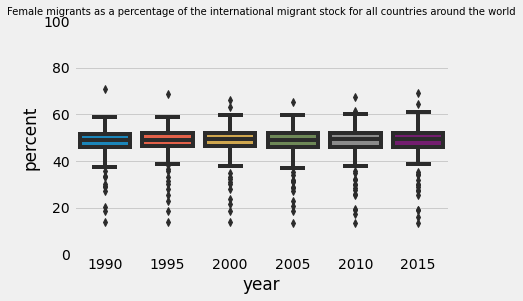

In [21]:
#As we can see that the female migrant percentage of the international migrant stock in USA is always greater than 50, 
#which means that female migrant is always greater than male migrant in USA over years.

# Therefore, I would be curious about the female percentage of the international migrant stock in all countries in 2015
# around the world
Fmigrantperc = df1[["Sort order", "Destination", "Country code","year","Destination","Female migrants as a percentage of the international migrant stock"]]
Fmigrantperc2015 = Fmigrantperc[Fmigrantperc.year== '2015']
Fmigrantperc2015 = Fmigrantperc2015.drop(Fmigrantperc2015.index[[0,1,2,3,4,5,6,7,28,38,46,52,70,71,77,85,97,107,126,127,138,152,169,179,180,207,216,231,237,238,241,247,255]])
Fmigrantperc2015 = Fmigrantperc2015.sort_values(by=['Female migrants as a percentage of the international migrant stock'],ascending=False)
Fmigrantperc2010 = Fmigrantperc[Fmigrantperc.year== '2010']
Fmigrantperc2010 = Fmigrantperc2010.drop(Fmigrantperc2010.index[[0,1,2,3,4,5,6,7,28,38,46,52,70,71,77,85,97,107,126,127,138,152,169,179,180,207,216,231,237,238,241,247,255]])
Fmigrantperc2010 = Fmigrantperc2010.sort_values(by=['Female migrants as a percentage of the international migrant stock'],ascending=False)
Fmigrantperc2005 = Fmigrantperc[Fmigrantperc.year== '2005']
Fmigrantperc2005 = Fmigrantperc2005.drop(Fmigrantperc2005.index[[0,1,2,3,4,5,6,7,23,28,38,46,52,70,71,77,85,97,107,126,127,138,152,162,169,179,180,190,207,216,231,237,238,241,247,255]])
Fmigrantperc2005 = Fmigrantperc2005.sort_values(by=['Female migrants as a percentage of the international migrant stock'],ascending=False)
Fmigrantperc2000 = Fmigrantperc[Fmigrantperc.year== '2000']
Fmigrantperc2000 = Fmigrantperc2000.drop(Fmigrantperc2000.index[[0,1,2,3,4,5,6,7,23,28,38,46,52,70,71,77,85,97,107,126,127,138,152,162,169,179,180,190,203,207,216,231,237,238,241,247,255]])
Fmigrantperc2000 = Fmigrantperc2000.sort_values(by=['Female migrants as a percentage of the international migrant stock'],ascending=False)
Fmigrantperc1995 = Fmigrantperc[Fmigrantperc.year== '1995']
Fmigrantperc1995 = Fmigrantperc1995.drop(Fmigrantperc1995.index[[0,1,2,3,4,5,6,7,23,28,38,46,52,70,71,77,85,97,107,126,127,138,152,162,169,179,180,190,203,207,216,231,237,238,241,247,255]])
Fmigrantperc1995 = Fmigrantperc1995.sort_values(by=['Female migrants as a percentage of the international migrant stock'],ascending=False)
Fmigrantperc1990 = Fmigrantperc[Fmigrantperc.year== '1990']
Fmigrantperc1990 = Fmigrantperc1990.drop(Fmigrantperc1990.index[[0,1,2,3,4,5,6,7,23,28,38,46,52,70,71,77,85,97,107,126,127,138,152,162,169,179,180,190,203,207,216,231,237,238,241,247,255]])
Fmigrantperc1990 = Fmigrantperc1990.sort_values(by=['Female migrants as a percentage of the international migrant stock'],ascending=False)
#dropping missing rows, append together
Fmigrantperc =  Fmigrantperc1990.append([Fmigrantperc1995,Fmigrantperc2000,Fmigrantperc2005,Fmigrantperc2010,Fmigrantperc2015])
Fmigrantperc.rename(columns={"Female migrants as a percentage of the international migrant stock": 'percent'}, inplace=True)
#boxplot 
fig4 = sns.boxplot(data=Fmigrantperc, x="year", y="percent")
fig4.set_title("Female migrants as a percentage of the international migrant stock for all countries around the world", fontsize=10)
fig4.set(ylim=(0, 100))